# ***SCRAPING DATA***

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

google_play_scraper: Library ini digunakan untuk mengambil informasi aplikasi dan ulasan dari Google Play Store.
pandas: Digunakan untuk bekerja dengan data dalam format DataFrame.
datetime: Digunakan untuk menentukan rentang waktu (start_date dan end_date).

In [3]:
from google_play_scraper import reviews, Sort

app_id = 'com.bpjstku'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 10000
Contoh ulasan:
{'reviewId': 'f3e12a45-1a22-4fd9-9032-22079e2d76e2', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'good 👍👍', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2025, 4, 18, 8, 58, 4), 'replyContent': None, 'repliedAt': None, 'appVersion': None}


In [4]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_jmo.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)


Data berhasil diekspor ke 'hasil_scraper_ulasan_app_jmo.csv'


In [5]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_jmo.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [6]:
data.head(5)

,Review ID,Username,Rating,Review Text,Date
0,f3e12a45-1a22-4fd9-9032-22079e2d76e2,Pengguna Google,5,good 👍👍,2025-04-18 08:58:04
1,e8f936c6-ad6d-4af8-a9e5-87c32ab88324,Pengguna Google,1,buruk,2025-04-18 08:16:14
2,04f92dc1-d758-465a-a0d0-328546bf0924,Pengguna Google,1,tidak bisa di buka y ko bsa y,2025-04-18 08:10:25
3,e6392e75-8cd3-4b00-957a-50b1c4ee9b24,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,2025-04-18 08:09:54
4,aeec6b4b-22e2-4574-b909-50830c98ee74,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",2025-04-18 08:09:34


# ***PREPROCESSING DATA***

In [7]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_jmo.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
data.head(2)

,Review ID,Username,Rating,Review Text,Date
0,f3e12a45-1a22-4fd9-9032-22079e2d76e2,Pengguna Google,5,good 👍👍,2025-04-18 08:58:04
1,e8f936c6-ad6d-4af8-a9e5-87c32ab88324,Pengguna Google,1,buruk,2025-04-18 08:16:14


In [9]:
df  = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍
1,2025-04-18 08:16:14,Pengguna Google,1,buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget"


**PROSES HAPUS DATA DUPLIKAT**

---



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [11]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 9995
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         5948 non-null   object
 1   Username     5948 non-null   object
 2   Rating       5948 non-null   int64 
 3   Review Text  5948 non-null   object
dtypes: int64(1), object(3)
memory usage: 232.3+ KB


In [13]:
df.head(2)

,Date,Username,Rating,Review Text
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍
1,2025-04-18 08:16:14,Pengguna Google,1,buruk


**WORDCLOUD SEBELUM PREPROCESSING**

---



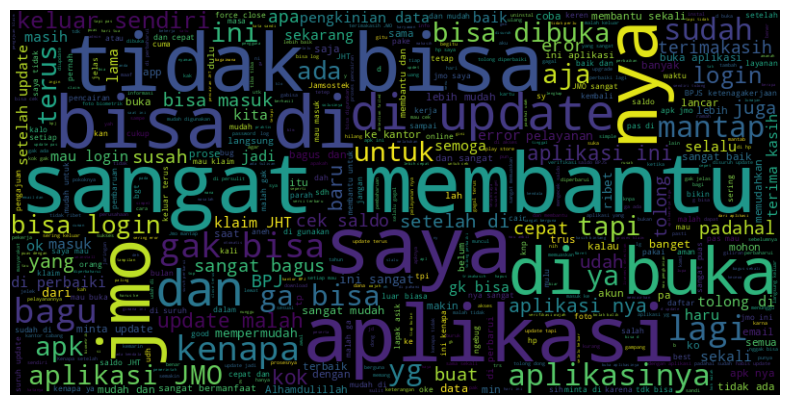

In [14]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

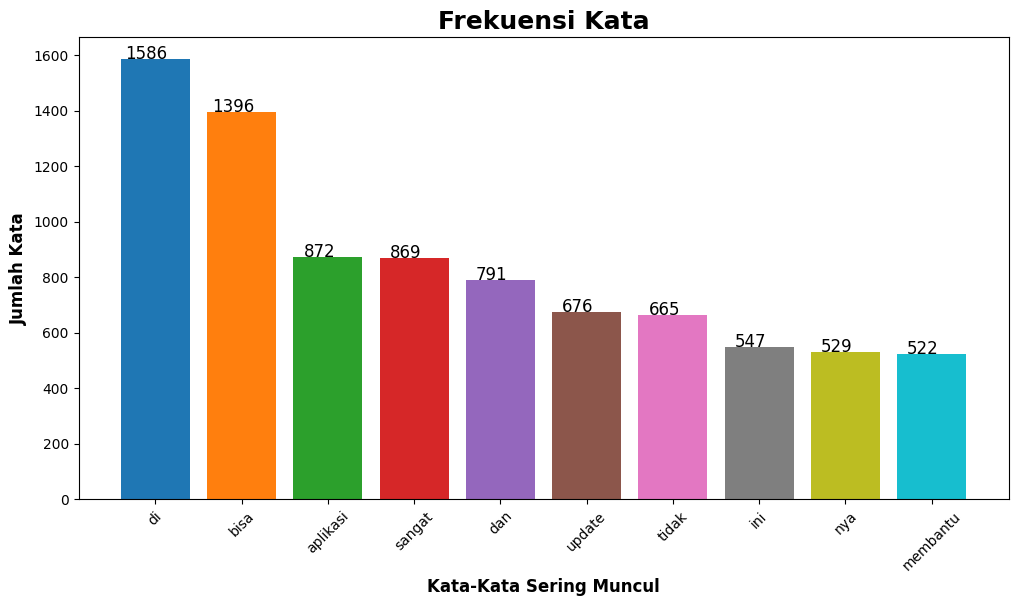

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

**PROSES CLEANING**

---



In [16]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget
5,2025-04-18 08:07:18,Pengguna Google,5,sangat puas,sangat puas
6,2025-04-18 08:07:00,Pengguna Google,2,kak mau tanya kenapa saya TDK bisa masuk aplik...,kak mau tanya kenapa saya TDK bisa masuk aplik...
7,2025-04-18 07:55:06,Pengguna Google,4,maaf kenapa aplikasi saya tidak dapat di buka,maaf kenapa aplikasi saya tidak dapat di buka
8,2025-04-18 07:47:21,Pengguna Google,5,bagus,bagus
9,2025-04-18 07:46:41,Pengguna Google,5,Trus truss trusss,Trus truss trusss


**PROSES CASE FOLDING**

---



In [17]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget


**Normalisasi Kata**

---



In [18]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [19]:
# Baca dataset
data =  pd.DataFrame(df[['Date','Username','Rating','Review Text','cleaning','case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget


In [20]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [21]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

df =  pd.DataFrame(data[['Date','Username','Rating','Review Text','cleaning','case_folding','normalisasi']])

df.head(20)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget
5,2025-04-18 08:07:18,Pengguna Google,5,sangat puas,sangat puas,sangat puas,sangat puas
6,2025-04-18 08:07:00,Pengguna Google,2,kak mau tanya kenapa saya TDK bisa masuk aplik...,kak mau tanya kenapa saya TDK bisa masuk aplik...,kak mau tanya kenapa saya tdk bisa masuk aplik...,kak mau tanya kenapa saya tidak bisa masuk apl...
7,2025-04-18 07:55:06,Pengguna Google,4,maaf kenapa aplikasi saya tidak dapat di buka,maaf kenapa aplikasi saya tidak dapat di buka,maaf kenapa aplikasi saya tidak dapat di buka,maaf kenapa aplikasi saya tidak dapat di buka
8,2025-04-18 07:47:21,Pengguna Google,5,bagus,bagus,bagus,bagus
9,2025-04-18 07:46:41,Pengguna Google,5,Trus truss trusss,Trus truss trusss,trus truss trusss,terus truss terus


**TOKENIZATION**

---



In [22]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,[good]
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,[buruk]
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"[tidak, bisa, di, buka, ya, kok, bisa, ya]"
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"[ini, kenapa, sekarang, tidak, bisa, di, buka,..."
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"[bagus, sicuma, menunggu, nonaktifnya, lama, b..."


**PROSES STOPWORD REMOVAL**

---



In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,[good],[good]
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,[buruk],[buruk]
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"[tidak, bisa, di, buka, ya, kok, bisa, ya]","[buka, ya, ya]"
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"[ini, kenapa, sekarang, tidak, bisa, di, buka,...","[buka, aplikasi, nyasaya, cek, error, jmo, ya]"
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"[bagus, sicuma, menunggu, nonaktifnya, lama, b...","[bagus, sicuma, menunggu, nonaktifnya, banget]"


**PROSES STEAMING DATA**

---



In [25]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [26]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,[good],[good],good
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,[buruk],[buruk],buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"[tidak, bisa, di, buka, ya, kok, bisa, ya]","[buka, ya, ya]",buka ya ya
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"[ini, kenapa, sekarang, tidak, bisa, di, buka,...","[buka, aplikasi, nyasaya, cek, error, jmo, ya]",buka aplikasi nyasaya cek error jmo ya
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"[bagus, sicuma, menunggu, nonaktifnya, lama, b...","[bagus, sicuma, menunggu, nonaktifnya, banget]",bagus sicuma tunggu nonaktif banget


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 9995
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5948 non-null   object
 1   Username          5948 non-null   object
 2   Rating            5948 non-null   int64 
 3   Review Text       5948 non-null   object
 4   cleaning          5948 non-null   object
 5   case_folding      5948 non-null   object
 6   normalisasi       5948 non-null   object
 7   tokenize          5948 non-null   object
 8   stopword removal  5948 non-null   object
 9   steming_data      5948 non-null   object
dtypes: int64(1), object(9)
memory usage: 640.2+ KB


In [28]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

**WORDCLOUD SETELAH PREPROCESSING**

---



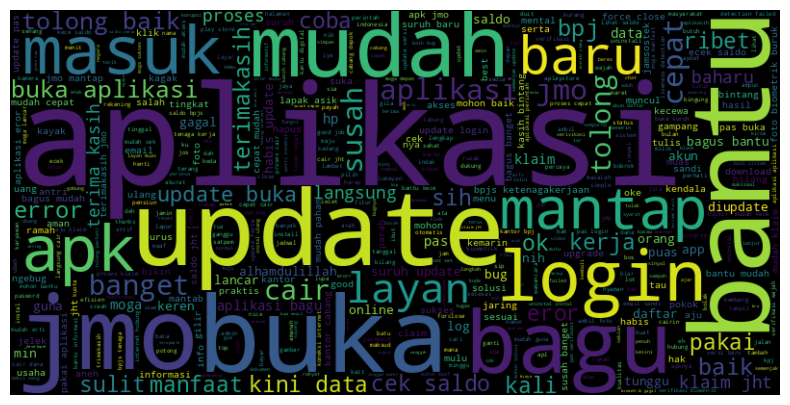

In [29]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
# df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

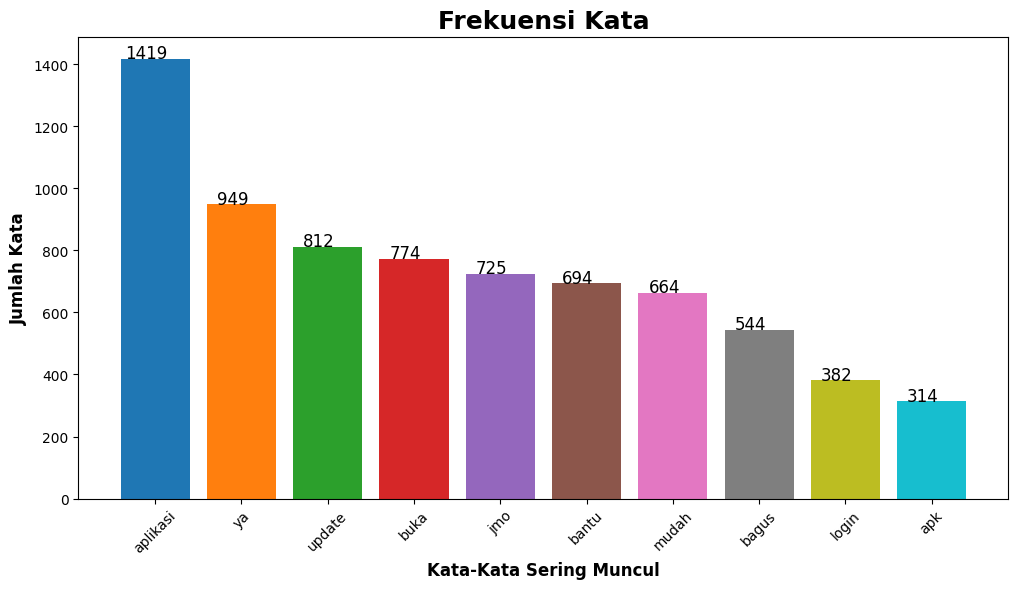

In [30]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# ***LABELLING DATA LEXICON BASED***

LINK GITHUB LABEL POSITIF & NEGATIF : https://github.com/fajri91/InSet

In [32]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,['good'],['good'],good
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,['buruk'],['buruk'],buruk
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"['tidak', 'bisa', 'di', 'buka', 'ya', 'kok', '...","['buka', 'ya', 'ya']",buka ya ya
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"['ini', 'kenapa', 'sekarang', 'tidak', 'bisa',...","['buka', 'aplikasi', 'nyasaya', 'cek', 'error'...",buka aplikasi nyasaya cek error jmo ya
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...","['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...",bagus sicuma tunggu nonaktif banget


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5948 non-null   object
 1   Username          5948 non-null   object
 2   Rating            5948 non-null   int64 
 3   Review Text       5948 non-null   object
 4   cleaning          5905 non-null   object
 5   case_folding      5905 non-null   object
 6   normalisasi       5898 non-null   object
 7   tokenize          5948 non-null   object
 8   stopword removal  5948 non-null   object
 9   steming_data      5834 non-null   object
dtypes: int64(1), object(9)
memory usage: 464.8+ KB


In [34]:
df = data.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5834 entries, 0 to 5947
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5834 non-null   object
 1   Username          5834 non-null   object
 2   Rating            5834 non-null   int64 
 3   Review Text       5834 non-null   object
 4   cleaning          5834 non-null   object
 5   case_folding      5834 non-null   object
 6   normalisasi       5834 non-null   object
 7   tokenize          5834 non-null   object
 8   stopword removal  5834 non-null   object
 9   steming_data      5834 non-null   object
dtypes: int64(1), object(9)
memory usage: 501.4+ KB


In [36]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments


df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())

df.head()

<ipython-input-36-c843614cb543>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
<ipython-input-36-c843614cb543>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,['good'],['good'],good,Positif
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,['buruk'],['buruk'],buruk,Negatif
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"['tidak', 'bisa', 'di', 'buka', 'ya', 'kok', '...","['buka', 'ya', 'ya']",buka ya ya,Positif
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"['ini', 'kenapa', 'sekarang', 'tidak', 'bisa',...","['buka', 'aplikasi', 'nyasaya', 'cek', 'error'...",buka aplikasi nyasaya cek error jmo ya,Negatif
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...","['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...",bagus sicuma tunggu nonaktif banget,Positif


<ipython-input-37-3056cd58f750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


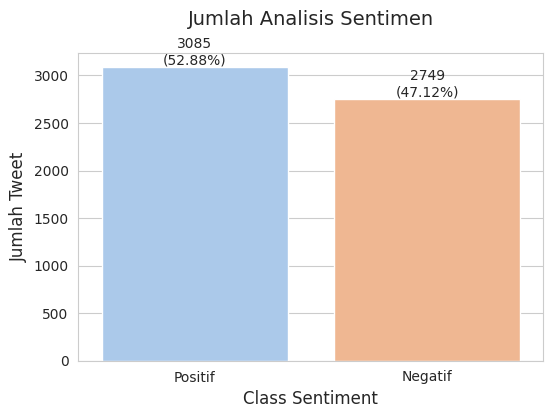

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [38]:
df.to_csv('Hasil_Labelling_Data.csv',encoding='utf8', index=False)

# ***MODEL ALGORITMA SUPPORT VECTOR MACHINE (SVM)***

In [39]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,['good'],['good'],good,Positif
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,['buruk'],['buruk'],buruk,Negatif
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"['tidak', 'bisa', 'di', 'buka', 'ya', 'kok', '...","['buka', 'ya', 'ya']",buka ya ya,Positif
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"['ini', 'kenapa', 'sekarang', 'tidak', 'bisa',...","['buka', 'aplikasi', 'nyasaya', 'cek', 'error'...",buka aplikasi nyasaya cek error jmo ya,Negatif
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...","['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...",bagus sicuma tunggu nonaktif banget,Positif


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5834 non-null   object
 1   Username          5834 non-null   object
 2   Rating            5834 non-null   int64 
 3   Review Text       5834 non-null   object
 4   cleaning          5834 non-null   object
 5   case_folding      5834 non-null   object
 6   normalisasi       5834 non-null   object
 7   tokenize          5834 non-null   object
 8   stopword removal  5834 non-null   object
 9   steming_data      5834 non-null   object
 10  Sentiment         5834 non-null   object
dtypes: int64(1), object(10)
memory usage: 501.5+ KB


In [41]:
df = data.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5834 non-null   object
 1   Username          5834 non-null   object
 2   Rating            5834 non-null   int64 
 3   Review Text       5834 non-null   object
 4   cleaning          5834 non-null   object
 5   case_folding      5834 non-null   object
 6   normalisasi       5834 non-null   object
 7   tokenize          5834 non-null   object
 8   stopword removal  5834 non-null   object
 9   steming_data      5834 non-null   object
 10  Sentiment         5834 non-null   object
dtypes: int64(1), object(10)
memory usage: 501.5+ KB


In [43]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [44]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [45]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [46]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 4667
Jumlah Data Uji: 1167


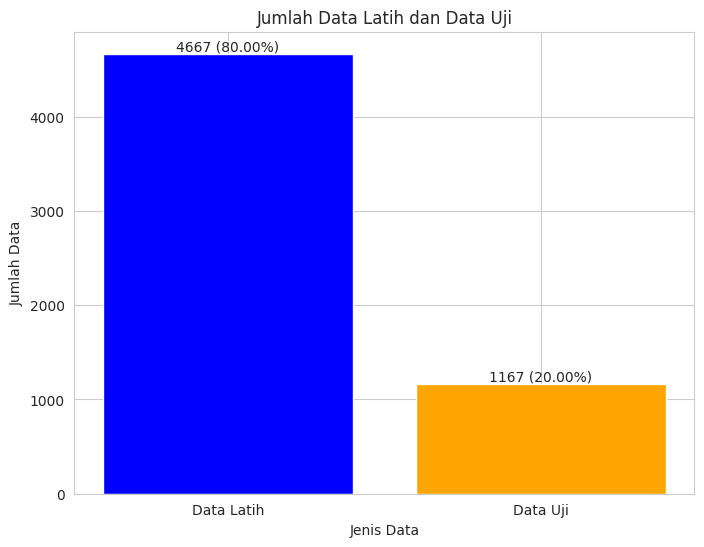

In [47]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


**SUPPORT VECTOR MACHINE (SVM)**

---





In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [50]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

# menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
# Membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [52]:
# Evaluasi model
y_pred_svm = svm.predict(X_test_vectorized)

In [53]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Confusion Matrix:
[[405 138]
 [121 503]]


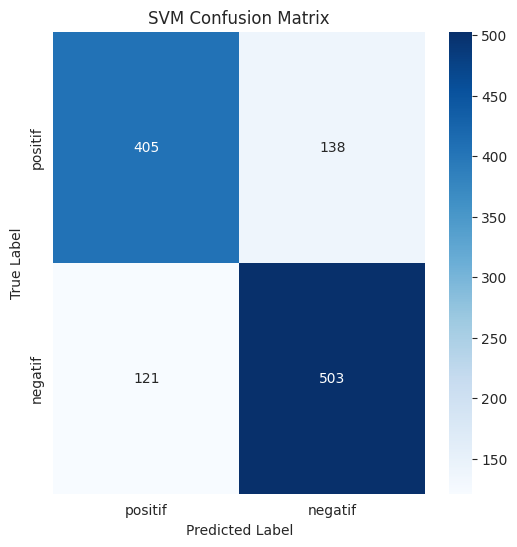

In [54]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif'],
                yticklabels=['positif', 'negatif'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix("SVM", y_test, y_pred_svm)

In [55]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")


accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.778063410454156

SVM Accuracy: 77.81%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.77      0.75      0.76       543
     Positif       0.78      0.81      0.80       624

    accuracy                           0.78      1167
   macro avg       0.78      0.78      0.78      1167
weighted avg       0.78      0.78      0.78      1167



# ***WORDCLOUD***

In [56]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-18 08:58:04,Pengguna Google,5,good 👍👍,good,good,good,['good'],['good'],good,Positif
1,2025-04-18 08:16:14,Pengguna Google,1,buruk,buruk,buruk,buruk,['buruk'],['buruk'],buruk,Negatif
2,2025-04-18 08:10:25,Pengguna Google,1,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka y ko bsa y,tidak bisa di buka ya kok bisa ya,"['tidak', 'bisa', 'di', 'buka', 'ya', 'kok', '...","['buka', 'ya', 'ya']",buka ya ya,Positif
3,2025-04-18 08:09:54,Pengguna Google,5,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,ini kenapa sekarang tidak bisa di buka aplikas...,"['ini', 'kenapa', 'sekarang', 'tidak', 'bisa',...","['buka', 'aplikasi', 'nyasaya', 'cek', 'error'...",buka aplikasi nyasaya cek error jmo ya,Negatif
4,2025-04-18 08:09:34,Pengguna Google,5,"bagus si,cuma nunggu nonaktifnya lama banget",bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma nunggu nonaktifnya lama banget,bagus sicuma menunggu nonaktifnya lama banget,"['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...","['bagus', 'sicuma', 'menunggu', 'nonaktifnya',...",bagus sicuma tunggu nonaktif banget,Positif


In [57]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [58]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

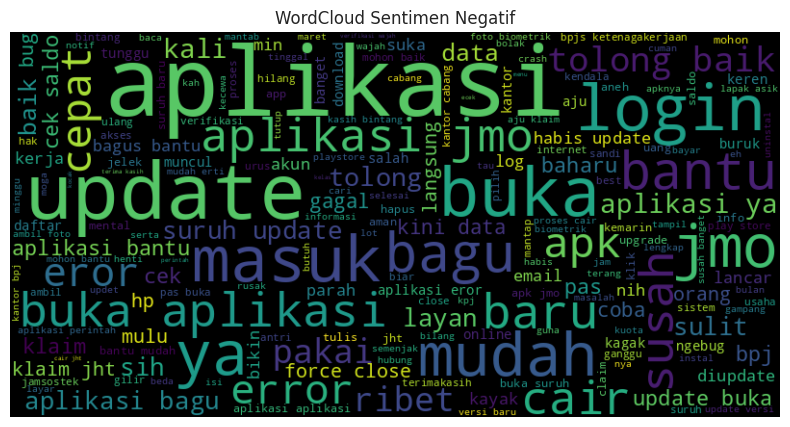

In [59]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

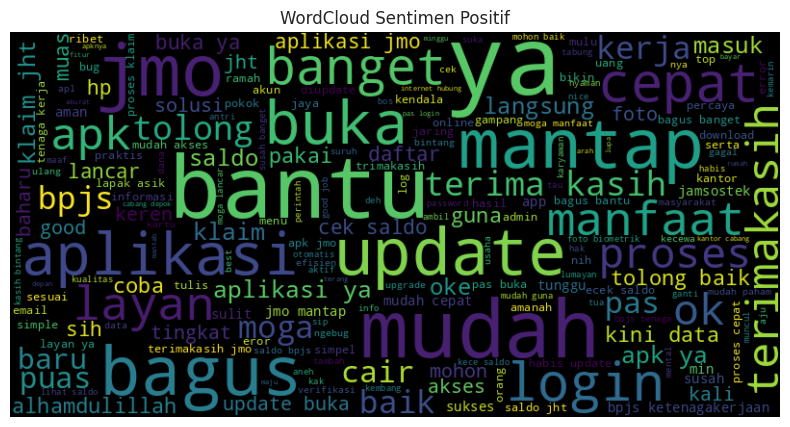

In [60]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

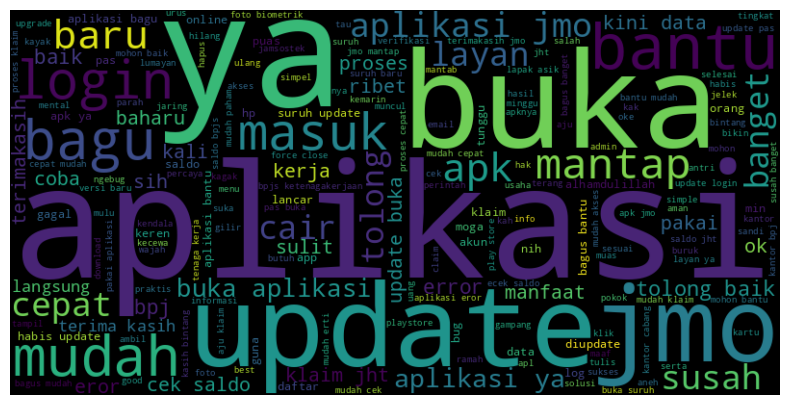

In [61]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

# ***RATING***

In [62]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5834 non-null   object
 1   Username          5834 non-null   object
 2   Rating            5834 non-null   int64 
 3   Review Text       5834 non-null   object
 4   cleaning          5834 non-null   object
 5   case_folding      5834 non-null   object
 6   normalisasi       5834 non-null   object
 7   tokenize          5834 non-null   object
 8   stopword removal  5834 non-null   object
 9   steming_data      5834 non-null   object
 10  Sentiment         5834 non-null   object
dtypes: int64(1), object(10)
memory usage: 501.5+ KB


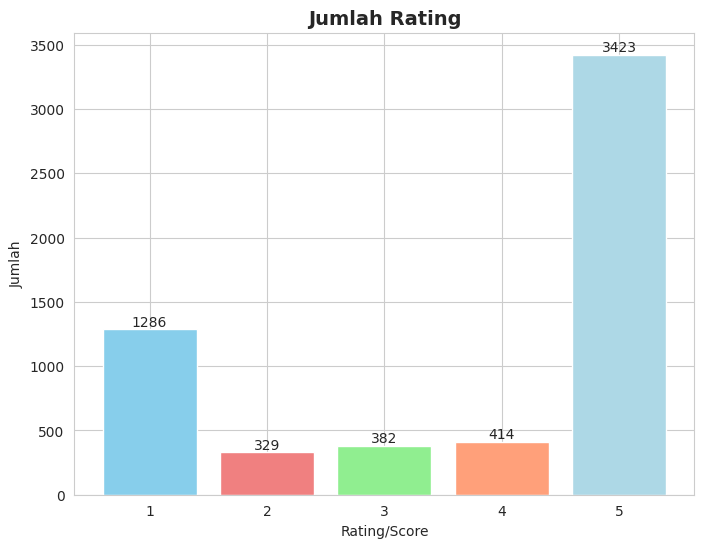

In [64]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()